In [1]:
#ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt

### 誤り近傍法(False Nearest Neighbor)
埋め込み次元の目安を推定する手法

In [2]:
#x:時系列，t:時間遅れ，M:埋め込み次元(ただし変数)

def FNN(x,t,m):
  #時系列の長さ（データ点数）
  N = len(x)

  #誤り近傍法の指標を入れる配列
  E1 = []
  #指標算出のための配列
  E = []

  #再構成ベクトル
  X = np.zeros((N-t,2))
  #距離を入れる配列
  d1 = []


  #埋め込み次元が２の時のケースを先に処理
  X[:,0] = x[0:N-t]
  X[:,1] = x[t:N]
  n = len(X)

  for j in range(n):
    dist1 = np.zeros(n)

    #任意の状態空間の点同士の距離を全て算出
    dist1[:] = np.linalg.norm(X[j,:]-X[:,:],axis=1)

    #求めた距離をソート
    d1.append(np.sort(dist1)[1])




  #埋め込み次元が３以上の時の処理
  for i in range(1,m+1):

    #埋め込むためのデータ数が不足した場合終了
    if N-(i+1)*t<=0:
      return E1

    #再構成ベクトル
    X2 = np.zeros((N-(i+1)*t,i+2))
    #距離を入れる配列
    d2 = []

    n = len(X2)

    for j in range(i+2):
      X2[:,j] = x[j*t:j*t+N-(i+1)*t]

    for j in range(n):
      dist1 = np.zeros(n)
      #任意の状態空間の点同士の距離を全て算出
      dist1 = np.linalg.norm(X2[j,:]-X2[:,:],axis=1)

      #求めた距離をソート
      d2.append(np.sort(dist1)[1])


    #1つ低い次元の距離で割った値
    a = np.array(d2)[:]/np.array(d1)[:len(d2)]
    #対象の次元における1つ低い次元との比較について平均を算出
    E.append(np.mean(a))

    #1つ高い次元との比較のためにd1を更新
    d1 = np.copy(d2)


  for i in range(m-1):
    #求めた1つ低い次元との比較の平均をさらに1つ異なる次元の値と比較
    E1.append(E[i+1]/E[i])
    if np.isnan(E1[-1]):
      E1[-1] = 0


  M = np.arange(2,m+1)
  plt.plot(M,E1)
  plt.xlabel("Dimension",fontsize=14)
  plt.grid()
  return E1

[0.6808802578666698,
 0.8979253234686562,
 0.9360293705433819,
 0.9660029776515927,
 0.9802951355936025,
 0.9855563143127911]

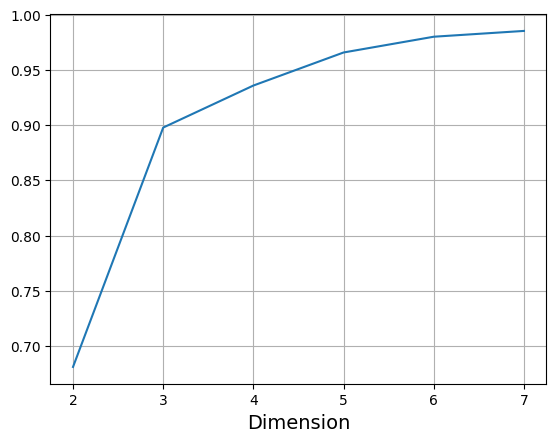

In [3]:
p = 10
r = 28
b = 8/3

def f1(x,y):
  return -p*x+p*y
def f2(x,y,z):
  return -x*z+r*x-y
def f3(x,y,z):
  return x*y-b*z

dt = 0.01
x = 0.2
y = 0.3
z = 0.4
X = []
Y = []
Z = []

for i in range(5000):
  X.append(x)
  Y.append(y)
  Z.append(z)
  k1x = f1(x,y)*dt
  k1y = f2(x,y,z)*dt
  k1z = f3(x,y,z)*dt

  k2x = f1(x+0.5*k1x,y+0.5*k1y)*dt
  k2y = f2(x+0.5*k1x,y+0.5*k1y,z+0.5*k1z)*dt
  k2z = f3(x+0.5*k1x,y+0.5*k1y,z+0.5*k1z)*dt

  k3x = f1(x+0.5*k2x,y+0.5*k2y)*dt
  k3y = f2(x+0.5*k2x,y+0.5*k2y,z+0.5*k2z)*dt
  k3z = f3(x+0.5*k2x,y+0.5*k2y,z+0.5*k2z)*dt

  k4x = f1(x+k3x,y+k3y)*dt
  k4y = f2(x+k3x,y+k3y,z+k3z)*dt
  k4z = f3(x+k3x,y+k3y,z+k3z)*dt

  x += (k1x+2*k2x+2*k3x+k4x)/6
  y += (k1y+2*k2y+2*k3y+k4y)/6
  z += (k1z+2*k2z+2*k3z+k4z)/6

FNN(Y,7,7)

### 並進誤差

Text(0.5, 0, 'z')

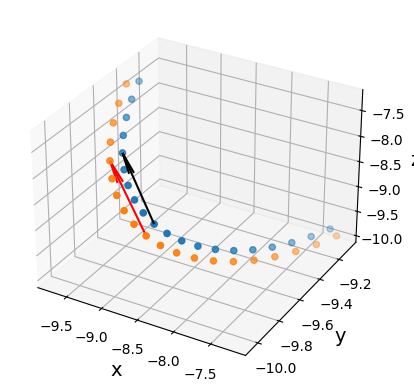

In [4]:
#ローレンツ方程式Xの軌道並行度
from mpl_toolkits.mplot3d import Axes3D
tau = 14

#パラメータ
p = 10
r = 28
b = 8/3

def f1(x,y):
  return -p*x+p*y
def f2(x,y,z):
  return -x*z+r*x-y
def f3(x,y,z):
  return x*y-b*z

dt = 0.01
x = 0.2
y = 0.3
z = 0.4
X = []
Y = []
Z = []

for i in range(5000):
  X.append(x)
  Y.append(y)
  Z.append(z)
  k1x = f1(x,y)*dt
  k1y = f2(x,y,z)*dt
  k1z = f3(x,y,z)*dt

  k2x = f1(x+0.5*k1x,y+0.5*k1y)*dt
  k2y = f2(x+0.5*k1x,y+0.5*k1y,z+0.5*k1z)*dt
  k2z = f3(x+0.5*k1x,y+0.5*k1y,z+0.5*k1z)*dt

  k3x = f1(x+0.5*k2x,y+0.5*k2y)*dt
  k3y = f2(x+0.5*k2x,y+0.5*k2y,z+0.5*k2z)*dt
  k3z = f3(x+0.5*k2x,y+0.5*k2y,z+0.5*k2z)*dt

  k4x = f1(x+k3x,y+k3y)*dt
  k4y = f2(x+k3x,y+k3y,z+k3z)*dt
  k4z = f3(x+k3x,y+k3y,z+k3z)*dt

  x += (k1x+2*k2x+2*k3x+k4x)/6
  y += (k1y+2*k2y+2*k3y+k4y)/6
  z += (k1z+2*k2z+2*k3z+k4z)/6



#任意の点
t = 400

#２点の間隔
stp = 5

#前半3000点までを抽出
X = X[:3000]
XX = np.zeros((len(X)-3*tau,3))

#埋め込み
for i in range(3):
  XX[:,i] = X[i*tau:i*tau+len(X)-3*tau]


#距離
dist = []
for i in range(len(XX)):
  dist.append(np.linalg.norm(XX[i,:]-XX[t,:]))

#近傍のインデックス
nind = np.argsort(dist)[2]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#点t付近の軌道
ax.scatter(XX[t-10:t+10,0],XX[t-10:t+10,1],XX[t-10:t+10,2])
#近傍点付近の軌道
ax.scatter(XX[nind-10:nind+10,0],XX[nind-10:nind+10,1],XX[nind-10:nind+10,2])
#点tのstp数先の点と点tを結んだベクトル
ax.quiver3D(XX[t,0],XX[t,1],XX[t,2],XX[t+stp,0]-XX[t,0],XX[t+stp,1]-XX[t,1],XX[t+stp,2]-XX[t,2],color="k")
#近傍点のstp数先の点と近傍点を結んだベクトル
ax.quiver3D(XX[nind,0],XX[nind,1],XX[nind,2],XX[nind+stp,0]-XX[nind,0],XX[nind+stp,1]-XX[nind,1],XX[nind+stp,2]-XX[nind,2],color="r")

ax.set_xlabel("x",fontsize=14)
ax.set_ylabel("y",fontsize=14)
ax.set_zlabel("z",fontsize=14)

Text(0.5, 0, 'z')

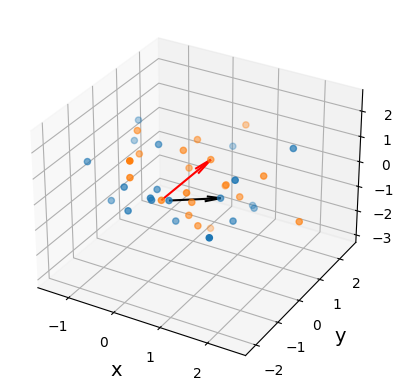

In [19]:
#乱数列の軌道並行度
import numpy as np

#任意の点
t = 400

#２点の間隔
stp = 5

#前半3000点までを抽出
X = np.random.randn(3000)
XX = np.zeros((len(X)-3*tau,3))

#埋め込み
for i in range(3):
  XX[:,i] = X[i*tau:i*tau+len(X)-3*tau]


#距離
dist = []
for i in range(len(XX)):
  dist.append(np.linalg.norm(XX[i,:]-XX[t,:]))

#近傍のインデックス
nind = np.argsort(dist)[2]


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#点t付近の軌道
ax.scatter(XX[t-10:t+10,0],XX[t-10:t+10,1],XX[t-10:t+10,2])
#近傍点付近の軌道
ax.scatter(XX[nind-10:nind+10,0],XX[nind-10:nind+10,1],XX[nind-10:nind+10,2])
#点tのstp数先の点と点tを結んだベクトル
ax.quiver3D(XX[t,0],XX[t,1],XX[t,2],XX[t+stp,0]-XX[t,0],XX[t+stp,1]-XX[t,1],XX[t+stp,2]-XX[t,2],color="k")
#近傍点のstp数先の点と近傍点を結んだベクトル
ax.quiver3D(XX[nind,0],XX[nind,1],XX[nind,2],XX[nind+stp,0]-XX[nind,0],XX[nind+stp,1]-XX[nind,1],XX[nind+stp,2]-XX[nind,2],color="r")

ax.set_xlabel("x",fontsize=14)
ax.set_ylabel("y",fontsize=14)
ax.set_zlabel("z",fontsize=14)

In [6]:
#並進誤差
#x:時系列，t:時間遅れ，M:埋め込み次元の最大値，nn:使用する状態空間上の近傍点数，stp:並進誤差算出次のステップ数
#Q:並進誤差算出次のサンプリングする状態空間上の点数，A:並進誤差算出処理の回数

def TransErr(x,t,M,nn,stp,Q,A):
  #時系列の長さ（データ点数）
  N = len(x)
  #各埋め込み次元ごとに算出される最終値を格納する配列
  TE = []

  #埋め込み次元Mまでのアトラクタ再構成
  for m in range(1,M+1):
    X = np.zeros((N-(m-1)*t,m))
    for i in range(1,m+1):
      X[:,i-1] = x[(i-1)*t:i*t+N-m*t]

    #並進誤差A回分を格納する配列
    E = np.zeros(A)
    for a in range(A):

      #サンプリング数ごとに算出される値を格納する配列
      e = np.zeros(Q)
      #eに格納するためのインデックス
      j = 0

      sample = np.random.choice(len(X)-stp,Q,replace=False)
      for i in sample:
        #データ点数を超えないように処理
        dist = np.zeros(len(X)-stp)

        #対象のデータ点と状態空間上の任意の点の距離を計算
        dist[:] = np.linalg.norm(X[i,:]-X[:len(X)-stp,:],axis=1)

        #距離の短い順にindexを取得
        di = np.argsort(dist)

        #推移ベクトル用
        v = np.zeros(nn+1)

        #対象のデータ点と近傍点nn個のstp数先の点との推移ベクトルを算出
        v = X[di[:nn+1]+stp,:]-X[di[:nn+1],:]

        #求めた推移ベクトルの平均ベクトルを算出
        v_ave = np.mean(v,axis=0)

        #それぞれデータ点と求めた平均との差分を算出
        v_var = np.sum(np.linalg.norm(v[:]-v_ave,ord=2,axis=1))

        #vをv_aveとv_varを使って算出されるスカラーに更新
        v = v_var/np.linalg.norm(v_ave,ord=2)

        #サンプリング１回で最終的に算出される値を格納
        e[j] = v/(nn+1)
        j += 1

      #サンプリング回数ごとに算出された最終値の中央値を格納
      E[a] = np.median(e)


    TE.append(np.mean(E))

  #表示するグラフの横軸である埋め込み次元
  zigen = np.arange(2,M+1)
  plt.plot(zigen,TE[1:],'-o')
  plt.xlabel("埋め込み次元",fontsize=14)
  plt.grid()
  return TE

In [ ]:
TransErr(X,14,8,5,5,100,100)

## フーリエトランスフォームサロゲート

非線形統計量として並進誤差を利用

In [8]:
#x:時系列，t:時間遅れ，m:埋め込み次元，nn:使用する状態空間上の近傍点数，stp:並進誤差算出次のステップ数，data:作成するサロゲートデータ数
#Q:並進誤差算出次のサンプリングする状態空間上の点数，A:並進誤差算出処理の回数

def surrogate(x,t,m,nn,stp,data,Q,A=10):
  N = len(x)

  #サロゲートデータの非線形統計量保存用の配列
  Es = np.zeros(data)


  x = np.array(x)

  #時系列データのデータ点数の偶奇で分ける
  if N%2 == 0:
    n = int(N/2)
    Judge = 0
  else:
    n = int((N-1)/2 + 1)
    Judge = 1

  for d in range(data+1):
    xs = np.copy(x)

    #d=0は元データ，それ以外はサロゲートデータ
    if d != 0:

      #フーリエ変換
      xs = np.fft.fft(xs)
      #位相をランダマイズ
      xs = xs[:n] * np.exp(np.random.rand(n)*2*np.pi*1j)

      if Judge == 0:
        xs = np.append(xs,xs[::-1])
      else:
        xs = np.append(xs,xs[-2::-1])

      #逆フーリエ変換
      xs = np.real(np.fft.ifft(xs))

    #埋め込み
    X = np.zeros((N-(m-1)*t,m))
    for i in range(1,m+1):
      X[:,i-1] = xs[(i-1)*t:i*t+N-m*t]


    #並進誤差A回分を格納する配列
    E = np.zeros(A)

    #A回処理開始
    for a in range(A):

      #サンプリング数ごとに算出される値を格納する配列
      e = np.zeros(Q)
      #eに格納するためのインデックス
      j = 0

      sample = np.random.choice(len(X)-stp,Q,replace=False)
      for i in sample:

        #データ点数を超えないように処理
        dist = np.zeros(len(X)-stp)

        #対象のデータ点と状態空間上の任意の点の距離を計算
        dist[:] = np.linalg.norm(X[i,:]-X[:len(X)-stp,:],axis=1)

        #距離の短い順にindexを取得
        di = np.argsort(dist)

        #推移ベクトル用
        v = np.zeros(nn+1)

        #対象のデータ点と近傍点nn個のstp数先の点との推移ベクトルを算出
        v = X[di[:nn+1]+stp,:]-X[di[:nn+1],:]

        #求めた推移ベクトルの平均ベクトルを算出
        v_ave = np.mean(v,axis=0)

        #それぞれデータ点と求めた平均との差分を算出
        v_var = np.sum(np.linalg.norm(v[:]-v_ave,ord=2,axis=1))

        #vをv_aveとv_varを使って算出されるスカラーに更新
        v = v_var/np.linalg.norm(v_ave,ord=2)

        #サンプリング１回で最終的に算出される値を格納
        e[j] = v/(nn+1)
        j += 1

      #サンプリング回数ごとに算出された最終値の中央値を格納
      E[a] = np.median(e)


    #オリジナルデータの非線形統計量
    if d == 0:
      Eo = np.mean(E)
    #サロゲートデータの非線形統計量を配列で保存
    else:
      Es[d-1] = np.mean(E)

    print(str(d)+'回目終了')

  return Eo,Es


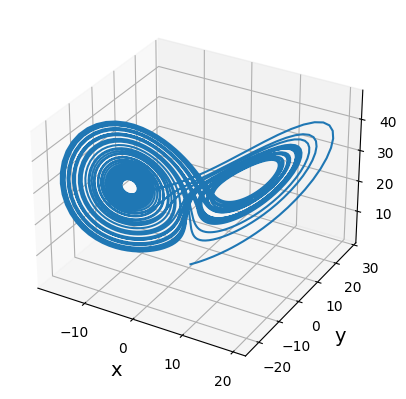

In [9]:
#Lorenz
from mpl_toolkits.mplot3d import Axes3D
p = 10
r = 28
b = 8/3

def f1(x,y):
  return -p*x+p*y
def f2(x,y,z):
  return -x*z+r*x-y
def f3(x,y,z):
  return x*y-b*z

dt = 0.01
x = 0.2
y = 0.3
z = 0.4
X = []
Y = []
Z = []

for i in range(5000):
  X.append(x)
  Y.append(y)
  Z.append(z)
  k1x = f1(x,y)*dt
  k1y = f2(x,y,z)*dt
  k1z = f3(x,y,z)*dt

  k2x = f1(x+0.5*k1x,y+0.5*k1y)*dt
  k2y = f2(x+0.5*k1x,y+0.5*k1y,z+0.5*k1z)*dt
  k2z = f3(x+0.5*k1x,y+0.5*k1y,z+0.5*k1z)*dt

  k3x = f1(x+0.5*k2x,y+0.5*k2y)*dt
  k3y = f2(x+0.5*k2x,y+0.5*k2y,z+0.5*k2z)*dt
  k3z = f3(x+0.5*k2x,y+0.5*k2y,z+0.5*k2z)*dt

  k4x = f1(x+k3x,y+k3y)*dt
  k4y = f2(x+k3x,y+k3y,z+k3z)*dt
  k4z = f3(x+k3x,y+k3y,z+k3z)*dt

  x += (k1x+2*k2x+2*k3x+k4x)/6
  y += (k1y+2*k2y+2*k3y+k4y)/6
  z += (k1z+2*k2z+2*k3z+k4z)/6

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel("x",fontsize=14)
ax.set_ylabel("y",fontsize=14)
ax.set_zlabel("z",fontsize=14)
ax.plot(X,Y,Z)
plt.show()


In [10]:
## test
np.savetxt("Lorenz_Y.csv",Y)

[ 0.3         0.35351694  0.41040673 ... 10.8607703  11.48923566
 12.12703677]


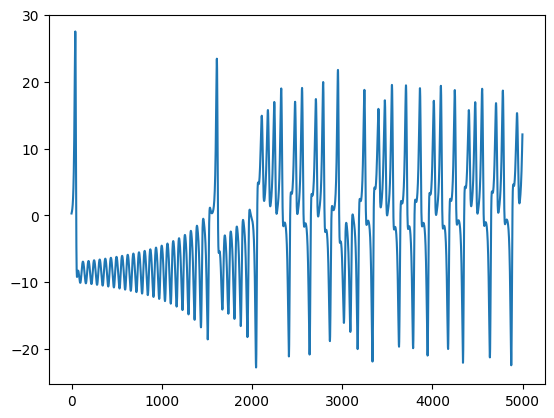

In [11]:
Y_c = np.loadtxt("Lorenz_Y.csv",delimiter=',')
print(Y_c)
plt.plot(Y_c)

0回目終了
1回目終了
2回目終了
3回目終了
4回目終了
5回目終了
6回目終了
7回目終了
8回目終了
9回目終了
10回目終了
11回目終了
12回目終了
13回目終了
14回目終了
15回目終了
16回目終了
17回目終了
18回目終了
19回目終了
20回目終了
21回目終了
22回目終了
23回目終了
24回目終了
25回目終了
26回目終了
27回目終了
28回目終了
29回目終了
30回目終了
31回目終了
32回目終了
33回目終了
34回目終了
35回目終了
36回目終了
37回目終了
38回目終了
39回目終了
40回目終了
41回目終了
42回目終了
43回目終了
44回目終了
45回目終了
46回目終了
47回目終了
48回目終了
49回目終了
50回目終了
51回目終了
52回目終了
53回目終了
54回目終了
55回目終了
56回目終了
57回目終了
58回目終了
59回目終了
60回目終了
61回目終了
62回目終了
63回目終了
64回目終了
65回目終了
66回目終了
67回目終了
68回目終了
69回目終了
70回目終了
71回目終了
72回目終了
73回目終了
74回目終了
75回目終了
76回目終了
77回目終了
78回目終了
79回目終了
80回目終了
81回目終了
82回目終了
83回目終了
84回目終了
85回目終了
86回目終了
87回目終了
88回目終了
89回目終了
90回目終了
91回目終了
92回目終了
93回目終了
94回目終了
95回目終了
96回目終了
97回目終了
98回目終了
99回目終了
100回目終了


(0.0, 7.0)

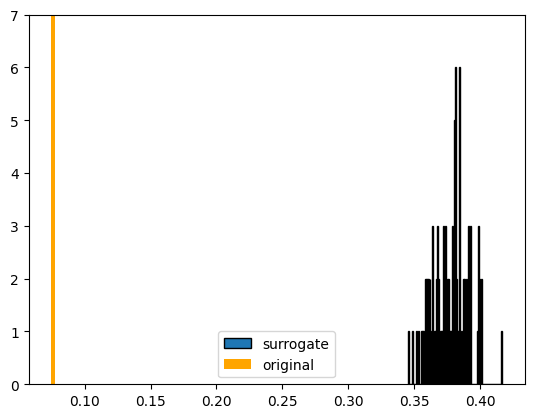

In [12]:
#Lorenz方程式のYを使用

eo,es = surrogate(Y,7,3,5,12,100,100,100)
histogram = plt.hist(es,bins=100,ec='black',label="surrogate")

limit = np.max(histogram[0])+1

plt.bar(eo,height=np.max(histogram[0])+1,width=0.003,color='orange',label="original")

plt.legend()
plt.ylim(0,limit)

### ニューラルネットによる力学系の推定を用いた時系列予測
埋め込みによる再構成アトラクタを利用

In [13]:
from tensorflow.keras.layers import Input,Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers

#t:時間遅れ，m:埋め込み次元
t = 14
m = 3

train_y = Y[:int(len(Y)/2)]
test_y = Y[int(len(Y)/2):]

#埋め込み
X = np.zeros((len(train_y)-(m-1)*t,m))
for i in range(m):
  X[:,i] = train_y[i*t:i*t+len(X)]

#学習データを入力と出力に分割
x_train = X[:len(X)-1,:]
y_train = X[1:len(X),:]

#tsb = TensorBoard(log_dir='./logs')
input = Input(shape=(m,))
middle1 = Dense(units=2*m,activation='sigmoid',use_bias=True)(input)
output = Dense(units=m,activation='linear')(middle1)
model = Model(inputs=[input],outputs=[output])

In [14]:
#コンパイル．最適化手法adam、損失関数は平方二乗誤差
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

Epoch 1/500
62/62 [==============================] - 2s 9ms/step - loss: 80.1522 - accuracy: 0.1903 - val_loss: 87.4520 - val_accuracy: 0.3576
Epoch 2/500
62/62 [==============================] - 0s 4ms/step - loss: 75.7296 - accuracy: 0.1179 - val_loss: 86.2745 - val_accuracy: 0.3616
Epoch 3/500
62/62 [==============================] - 0s 4ms/step - loss: 70.1835 - accuracy: 0.0845 - val_loss: 84.9356 - val_accuracy: 0.3697
Epoch 4/500
62/62 [==============================] - 0s 5ms/step - loss: 64.7924 - accuracy: 0.1584 - val_loss: 83.3437 - val_accuracy: 0.4040
Epoch 5/500
62/62 [==============================] - 0s 4ms/step - loss: 60.8606 - accuracy: 0.1964 - val_loss: 81.7118 - val_accuracy: 0.4061
Epoch 6/500
62/62 [==============================] - 0s 4ms/step - loss: 57.8611 - accuracy: 0.2141 - val_loss: 80.2868 - val_accuracy: 0.4040
Epoch 7/500
62/62 [==============================] - 0s 4ms/step - loss: 55.3450 - accuracy: 0.2237 - val_loss: 78.9664 - val_accuracy: 0.4040

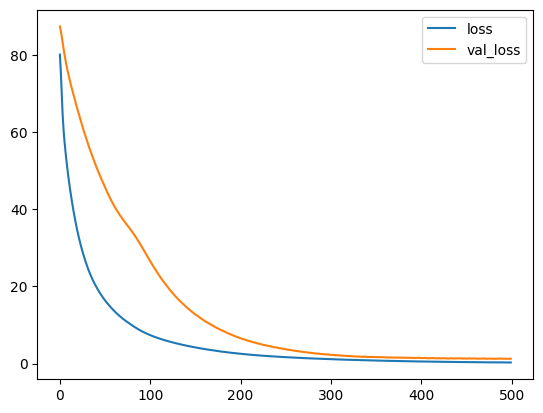

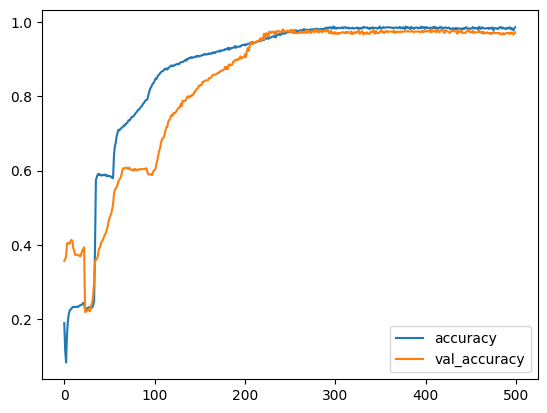

In [15]:
history = model.fit(x_train,y_train,epochs=500,validation_split=0.2)
plt.subplots()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.subplots()
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [16]:
#テストデータの埋め込み
X2 = np.zeros((len(test_y)-m*t,m))
for i in range(m):
  X2[:,i] = test_y[i*t:i*t+len(test_y)-m*t]

print(model.predict(X2))


77/77 [==============================] - 0s 1ms/step
[[ 0.02737486  1.0922716   3.9439206 ]
 [-0.15354955  1.2593563   4.253653  ]
 [-0.2755115   1.4204667   4.5893335 ]
 ...
 [ 4.6167126   1.8216498   5.470607  ]
 [ 3.9035103   2.0390432   5.835646  ]
 [ 3.2940028   2.263346    6.218901  ]]


77/77 [==============================] - 0s 1ms/step


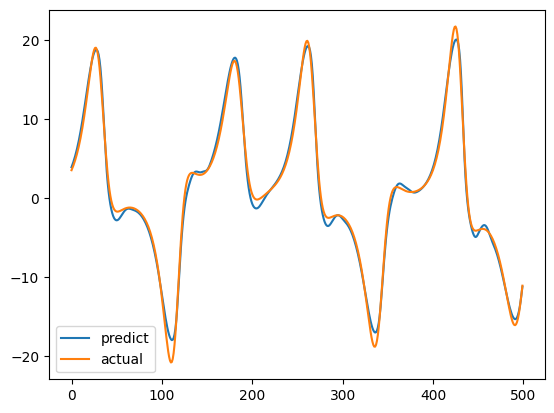

In [17]:
plt.plot(model.predict(X2)[:500,m-1],label='predict')
plt.plot(X2[1:501,m-1],label='actual')

plt.legend()